In [1]:
import requests

In [2]:
import pandas as pd

C:\Users\HISPL\AppData\Local\Temp\ipykernel_5820\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## getting data form websit and converting/saving it into csv.

In [3]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a local CSV file
    with open("downloaded_data.csv", "wb") as f:
        f.write(response.content)
    print("CSV file downloaded successfully")
else:
    print("Failed to download CSV file. Status code:", response.status_code)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("downloaded_data.csv")

CSV file downloaded successfully


# getting started with data analysis 

In [4]:
df.shape #getting the shape of data

(891, 12)

###  observations: we have 891 row and 12 col.

### trying to get the overview of data

In [5]:
df.head() #we are using sample for getting over-view of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### observations :
                    the data having 12 col. 
                    cabin is have some nan or null values.

In [6]:
df.info() #getting more information about the data and checking type of data every clm.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### observations
#### 1. from above we know that data have 11 col. and 891 rows 
#### 2. we have some missing datas in :-age ,cabin and embarked col.

In [7]:
df.isnull().sum()  #checking missing values in data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### observations:
### Age , vabin and Embarked have Null values

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### observations

In [9]:
df.duplicated().sum()  #checking duplicates values in data

0

### observations: we don't have any duplicate data


In [10]:
df2=df
df2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [11]:
#df2.drop(['Name'],axis=1,inplace=True)

In [12]:
df2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [13]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q


In [14]:
df2=df2.drop(['Name','Sex','Ticket','Cabin'],axis=1) #drop the object data from dataset

## changeing the object into num to get better understanding between the dataset.

In [15]:
gender_mapping = {'male': 0, 'female': 1}
df2['Sex'] = df['Sex'].map(gender_mapping)
df2.sample(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
825,826,0,3,NaN,0,0,6.9500,Q,0
567,568,0,3,29.0,0,4,21.0750,S,1
138,139,0,3,16.0,0,0,9.2167,S,0
525,526,0,3,40.5,0,0,7.7500,Q,0
531,532,0,3,NaN,0,0,7.2292,C,0
669,670,1,1,NaN,1,0,52.0000,S,1
449,450,1,1,52.0,0,0,30.5000,S,0
24,25,0,3,8.0,3,1,21.0750,S,1
733,734,0,2,23.0,0,0,13.0000,S,0
446,447,1,2,13.0,0,1,19.5000,S,1


In [16]:
Embarked_mapping = {'S': 1, 'Q': 2, 'C': 3}
df2['Embarked'] = df['Embarked'].map(Embarked_mapping)
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,1.0,0
1,2,1,1,38.0,1,0,71.2833,3.0,1
2,3,1,3,26.0,0,0,7.9250,1.0,1
3,4,1,1,35.0,1,0,53.1000,1.0,1
4,5,0,3,35.0,0,0,8.0500,1.0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0
887,888,1,1,19.0,0,0,30.0000,1.0,1
888,889,0,3,NaN,1,2,23.4500,1.0,1
889,890,1,1,26.0,0,0,30.0000,3.0,0


## checking the relation and representiong data into Mathematical

In [17]:
df2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.013166,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.169718,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.164681,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.032565,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068900,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.040449,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.226311,0.182333
Embarked,-0.013166,0.169718,-0.164681,0.032565,-0.068900,-0.040449,0.226311,1.000000,0.110320
Sex,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.110320,1.000000


In [18]:
pwd

'C:\\Users\\HISPL\\Desktop\\day3'

# EDA on data sets

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# categorical Datas

In [23]:
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,1.0,0
1,2,1,1,38.0,1,0,71.2833,3.0,1
2,3,1,3,26.0,0,0,7.9250,1.0,1
3,4,1,1,35.0,1,0,53.1000,1.0,1
4,5,0,3,35.0,0,0,8.0500,1.0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0
887,888,1,1,19.0,0,0,30.0000,1.0,1
888,889,0,3,NaN,1,2,23.4500,1.0,1
889,890,1,1,26.0,0,0,30.0000,3.0,0


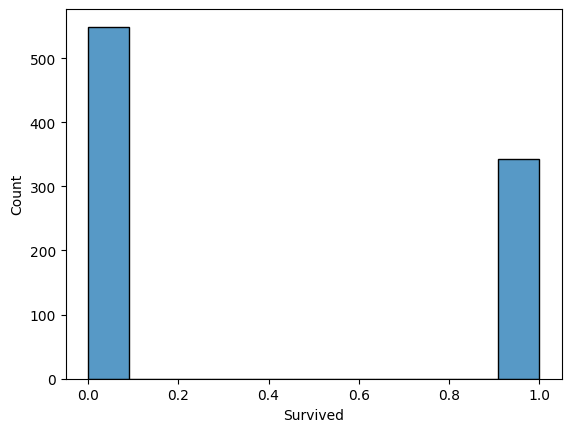

In [53]:
sns.histplot(df2['Survived'])
plt.show()

C:\Users\HISPL\AppData\Local\Temp\ipykernel_5820\1629471732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2,x='Pclass',palette='Set2')
C:\Users\HISPL\.conda\envs\Roshan\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HISPL\.conda\envs\Roshan\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HISPL\.conda\envs\Roshan\Lib\site-packages\seaborn\_ba

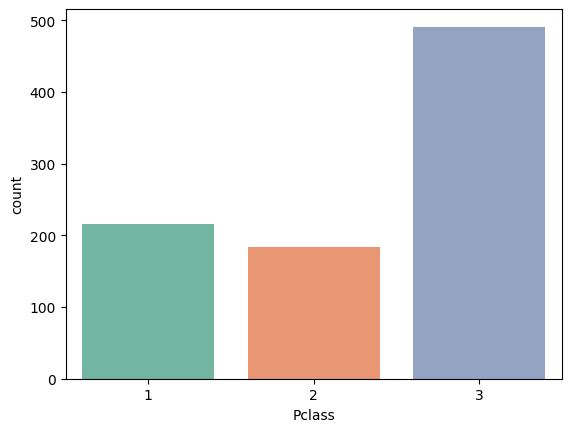

In [54]:
sns.countplot(data=df2,x='Pclass',palette='Set2')
plt.show()

C:\Users\HISPL\AppData\Local\Temp\ipykernel_5820\2755494831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df2,x='Embarked',palette='Set3')
C:\Users\HISPL\.conda\envs\Roshan\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HISPL\.conda\envs\Roshan\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HISPL\.conda\envs\Roshan\Lib\site-packages\seaborn\_base.

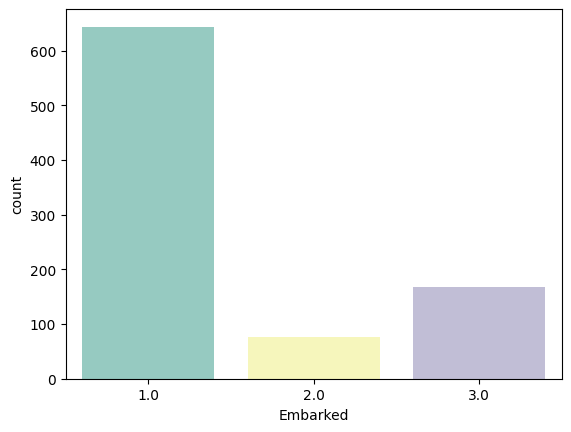

In [63]:
sns.countplot(df2,x='Embarked',palette='Set3')
plt.show()

C:\Users\HISPL\AppData\Local\Temp\ipykernel_5820\176412087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Age'])


<Axes: xlabel='Age', ylabel='Density'>

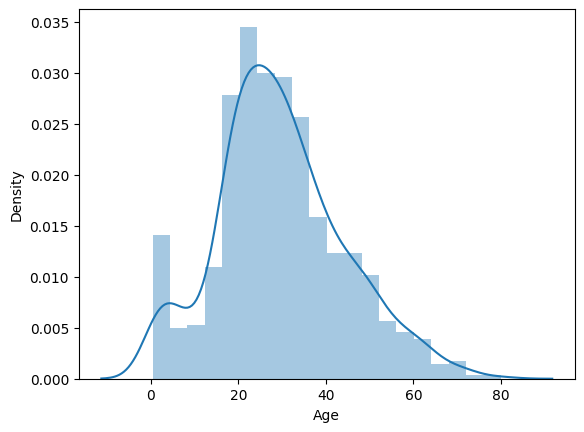

In [78]:
sns.distplot(df2['Age'])

<Axes: ylabel='count'>

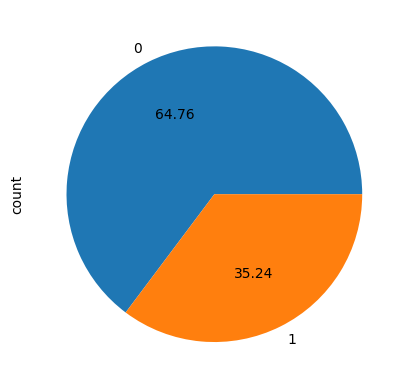

In [69]:
df2['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

C:\Users\HISPL\AppData\Local\Temp\ipykernel_5820\1587913859.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])


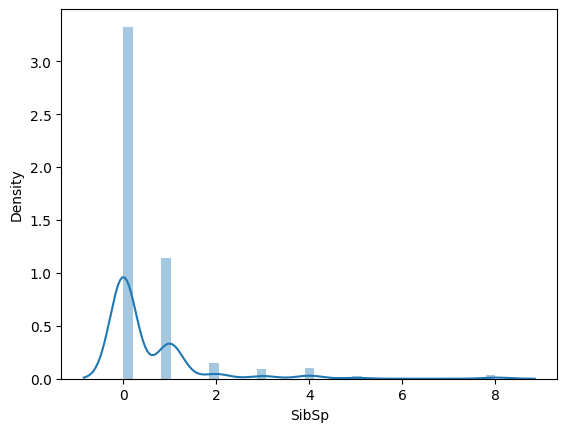

In [76]:
sns.distplot(df2['SibSp'])
plt.show()

C:\Users\HISPL\AppData\Local\Temp\ipykernel_5820\1487363048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Parch'])


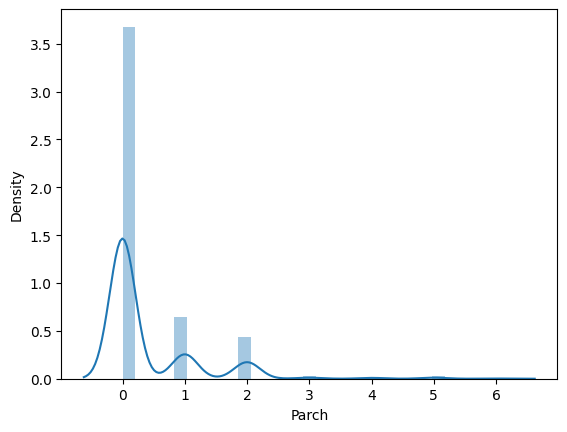

In [79]:
sns.distplot(df2['Parch'])
plt.show()

In [80]:
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,1.0,0
1,2,1,1,38.0,1,0,71.2833,3.0,1
2,3,1,3,26.0,0,0,7.9250,1.0,1
3,4,1,1,35.0,1,0,53.1000,1.0,1
4,5,0,3,35.0,0,0,8.0500,1.0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0
887,888,1,1,19.0,0,0,30.0000,1.0,1
888,889,0,3,NaN,1,2,23.4500,1.0,1
889,890,1,1,26.0,0,0,30.0000,3.0,0


<Axes: ylabel='count'>

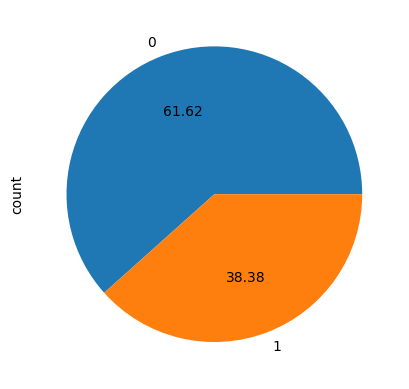

In [81]:
df2['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

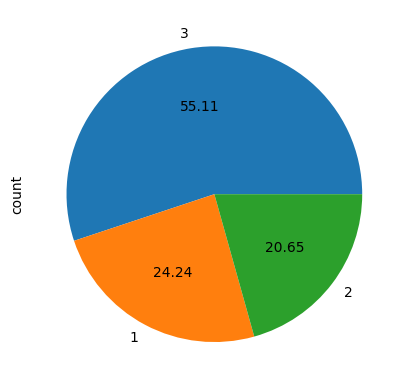

In [82]:
df2['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

#### df2['SibSp'].value_counts().plot(kind='pie',autopct='%.2f')
#### plt.show()
#### df2['Parch'].value_counts().plot(kind='pie',autopct='%.2f')
#### plt.show()
#### df2['Fare'].value_counts().plot(kind='pie',autopct='%.2f')
#### plt.show()

<Axes: ylabel='count'>

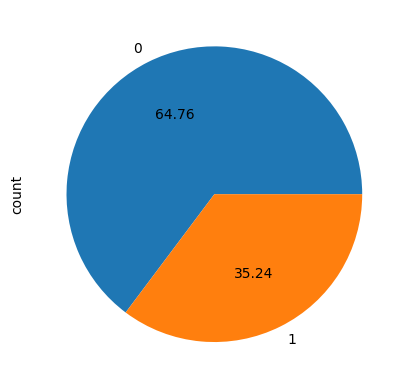

In [42]:
df2['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
sns.boxplot(df['Age'])

# Observations
- # only 38.28 % survived and 61.62 % not survived
- # Passangers class :55.11% was treveling in 3rd class ,24.24% was in 1st class and rest in 2nd class
- # Embarked : Southampton 70%, Cherbourg 20% , and Queenstown 10%
- # Age : maximum passangers was between 18 to 60 years
- # siblings and spouse : around 70% passangers not trevelin with there siblings or spouse
- # Parents and child : more then 60% passangers are treveling alone
  